In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import sklearn.svm as svm
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import itertools

In [3]:
# 导入数据
df = pd.read_csv('./OnlineNewsPopularity/OnlineNewsPopularity.csv')
keys = np.array(df.columns)
dic = {}
for colname in df:
    arr = df.loc[:,colname].values
    dic[colname] = arr
dic[keys[-1]] = dic[keys[-1]] > 1400

In [4]:
### 数据集划分

# 构建数据集与标签集
data_set = dic[keys[1]].reshape(-1,1)
for i in range(2,len(keys)-1):
    data_set = np.append(data_set, dic[keys[i]].reshape(-1,1), axis = 1)
label_set = dic[keys[-1]]
data_set = data_set[np.lexsort(-data_set.T[0, None])]

# 数据集划分
x_train, x_test, y_train, y_test = train_test_split(data_set, label_set, test_size=0.3, shuffle= False)

In [5]:
### 模型训练

#k折分层抽样
skf = StratifiedKFold(n_splits=5,shuffle=True)

#实例化svm模型
params = {'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 50], 'svm__C': [0.1, 1, 5, 10, 20, 50, 100]}
clf = Pipeline([('ss', StandardScaler()), ('svm', svm.SVC(kernel='rbf'))])
scores = ('accuracy', 'precision', 'f1', 'recall', 'roc_auc')
gs = GridSearchCV(clf, params, refit= 'accuracy', verbose= 1, cv= skf, scoring= scores)
gs.fit(x_train, y_train)
print('best params: ',gs.best_params_)
print('best score: ', gs.best_score_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
best params:  {'svm__C': 50, 'svm__gamma': 0.001}
best score:  0.6502702702702703


In [6]:
# 保存网格化搜索结果
np.save('./result/svm_cv_results_1218_42.npy', gs.cv_results_)  

In [7]:
## 依次比较五项评价指标结果
res = gs.cv_results_
idx = {}

In [16]:
# 按顺序执行五个代码块后再逆序执行一遍，可以获得全部结果
key = 'test_accuracy'
#print(res["mean_" + key])
idx[key] = np.argmax(res["mean_" + key])
# 打印每项指标中效果最好的一组参数在当前指标中的结果
for k in idx:
    print(k, res["mean_" + key][idx[k]])        # 当前指标结果
    print(gs.cv_results_['params'][idx[k]])     # 对应参数

test_accuracy 0.6502702702702703
{'svm__C': 50, 'svm__gamma': 0.001}
test_precision 0.6496936936936938
{'svm__C': 5, 'svm__gamma': 0.01}
test_f1 0.5829189189189189
{'svm__C': 0.1, 'svm__gamma': 0.1}
test_recall 0.5095495495495496
{'svm__C': 0.1, 'svm__gamma': 1}
test_roc_auc 0.6483243243243243
{'svm__C': 1, 'svm__gamma': 0.01}


In [15]:
# 比较结果
key = 'test_precision'
#print(res["mean_" + key])
idx[key] = np.argmax(res["mean_" + key])
for k in idx:
    print(k, res["mean_" + key][idx[k]])
    print(gs.cv_results_['params'][idx[k]])

test_accuracy 0.6574325943399592
{'svm__C': 50, 'svm__gamma': 0.001}
test_precision 0.6622610488199573
{'svm__C': 5, 'svm__gamma': 0.01}
test_f1 0.5559469720307737
{'svm__C': 0.1, 'svm__gamma': 0.1}
test_recall 0.5095495495495496
{'svm__C': 0.1, 'svm__gamma': 1}
test_roc_auc 0.6535026657753638
{'svm__C': 1, 'svm__gamma': 0.01}


In [14]:
# 比较结果
key = 'test_f1'
#print(res["mean_" + key])
idx[key] = np.argmax(res["mean_" + key])
for k in idx:
    print(k, res["mean_" + key][idx[k]])
    print(gs.cv_results_['params'][idx[k]])

test_accuracy 0.6560617915720626
{'svm__C': 50, 'svm__gamma': 0.001}
test_precision 0.6496964959956925
{'svm__C': 5, 'svm__gamma': 0.01}
test_f1 0.6878689369447825
{'svm__C': 0.1, 'svm__gamma': 0.1}
test_recall 0.6751014561947959
{'svm__C': 0.1, 'svm__gamma': 1}
test_roc_auc 0.6564052301586238
{'svm__C': 1, 'svm__gamma': 0.01}


In [13]:
# 比较结果
key = 'test_recall'
#print(res["mean_" + key])
idx[key] = np.argmax(res["mean_" + key])
for k in idx:
    print(k, res["mean_" + key][idx[k]])
    print(gs.cv_results_['params'][idx[k]])

test_accuracy 0.654879773691655
{'svm__C': 50, 'svm__gamma': 0.001}
test_precision 0.6376944837340878
{'svm__C': 5, 'svm__gamma': 0.01}
test_f1 0.9019094766619519
{'svm__C': 0.1, 'svm__gamma': 0.1}
test_recall 1.0
{'svm__C': 0.1, 'svm__gamma': 1}
test_roc_auc 0.6594766619519096
{'svm__C': 1, 'svm__gamma': 0.01}


In [12]:
# 比较结果
key = 'test_roc_auc'
#print(res["mean_" + key])
idx[key] = np.argmax(res["mean_" + key])
for k in idx:
    print(k, res["mean_" + key][idx[k]])
    print(gs.cv_results_['params'][idx[k]])

test_accuracy 0.7061164881051976
{'svm__C': 50, 'svm__gamma': 0.001}
test_precision 0.7044078476284701
{'svm__C': 5, 'svm__gamma': 0.01}
test_f1 0.6773933022041576
{'svm__C': 0.1, 'svm__gamma': 0.1}
test_recall 0.5901220683892678
{'svm__C': 0.1, 'svm__gamma': 1}
test_roc_auc 0.7076392057175698
{'svm__C': 1, 'svm__gamma': 0.01}


In [17]:
# 绘制混淆矩阵
def plot_confusion_matrix(cm, labels_name, title):
    plt.figure(figsize=(15,8),dpi=100)
    plt.subplot(1,2,1)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        num = '{}'.format(cm[i, j])
        plt.text(j, i, num,
                 verticalalignment='center',
                 horizontalalignment="center",
                 color="white" if int(num) > thresh else "black")
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

    
    plt.subplot(1,2,2)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        num = '{:.2f}'.format(cm[i, j])
        plt.text(j, i, num,
                 verticalalignment='center',
                 horizontalalignment="center",
                 color="white" if float(num) > thresh else "black")
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')
# 混淆矩阵绘制代码来源以下两篇博客：
# https://blog.csdn.net/kane7csdn/article/details/83756583
# https://blog.csdn.net/qq_18617009/article/details/103345308

In [18]:
### 模型预测
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# {'svm__C': 50, 'svm__gamma': 0.001}
model1 = svm.SVC(kernel='rbf', C=50, gamma=0.001)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

In [19]:
# {'svm__C': 1, 'svm__gamma': 0.01}
model2 = svm.SVC(kernel='rbf', C=1, gamma=0.01)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

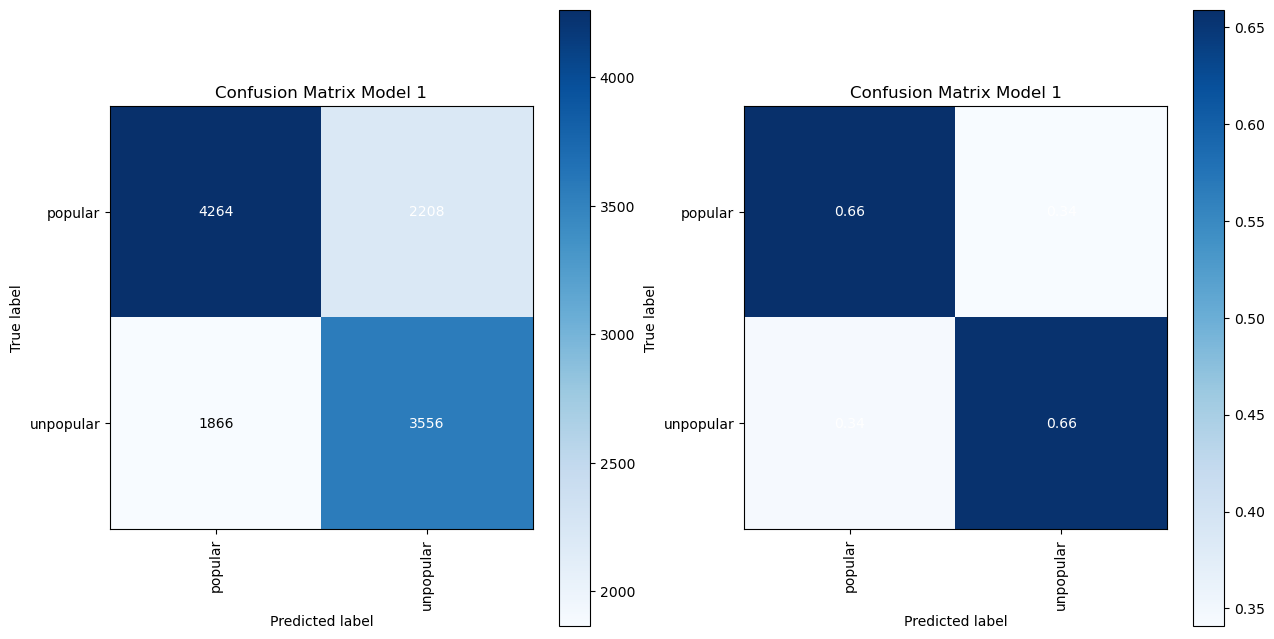

acc: 0.657474356818564
pre: 0.6169326856349757
recall: 0.6558465510881594
f1: 0.6357947434292865
AUCf1: 0.6573423113908041


In [20]:
#绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred1)
labels_name = ['popular','unpopular']
plot_confusion_matrix(cm, labels_name, "Confusion Matrix Model 1")
plt.show()
print("acc: " + str(accuracy_score(y_test, y_pred1)))
print("pre: " + str(precision_score(y_test, y_pred1)))
print("recall: " + str(recall_score(y_test, y_pred1)))
print("f1: " + str(f1_score(y_test, y_pred1)))
print("AUCf1: " + str(roc_auc_score(y_test, y_pred1)))

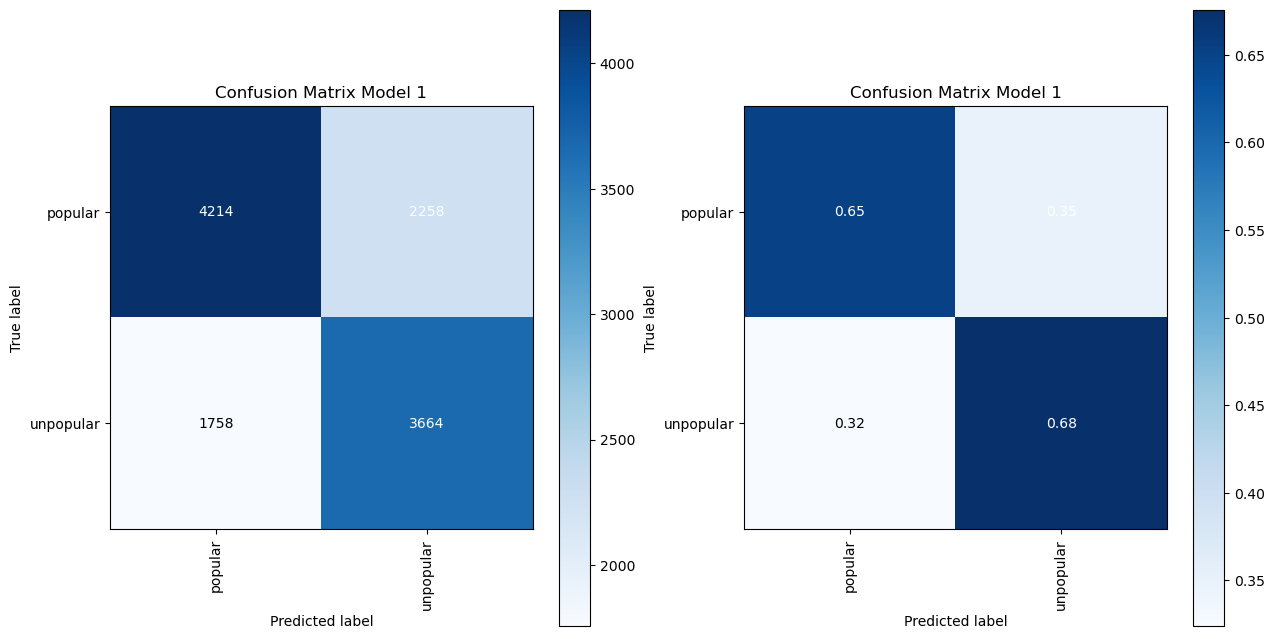

acc: 0.6623507650916428
pre: 0.61870989530564
recall: 0.6757654002213206
f1: 0.6459802538787025
AUC: 0.6634389423850732


In [21]:
#绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred2)
labels_name = ['popular','unpopular']
plot_confusion_matrix(cm, labels_name, "Confusion Matrix Model 1")
plt.show()
print("acc: " + str(accuracy_score(y_test, y_pred2)))
print("pre: " + str(precision_score(y_test, y_pred2)))
print("recall: " + str(recall_score(y_test, y_pred2)))
print("f1: " + str(f1_score(y_test, y_pred2)))
print("AUC: " + str(roc_auc_score(y_test, y_pred2)))